# Titanic Dataset

The Titanic dataset is a very famous one that I have taken from an old [Kaggle competition](https://www.kaggle.com/c/titanic). It is supposedly a fantastic set for an introductory dive into Logistic Regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
tt = pd.read_csv('titanic_train.csv')
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
tt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Exploration

([[Text(0, 0, 'Died'), Text(0, 0, 'Survived')]], Text(0.5, 0, ''))

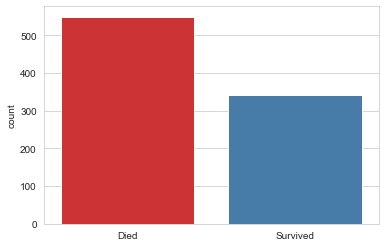

In [6]:
fig, ax = plt.subplots()
sns.countplot(
    x='Survived', 
    data=tt,
    palette='Set1'
)
ax.set(xticklabels=('Died', 'Survived')), ax.set_xlabel('')

([[Text(0, 0, 'Died'), Text(0, 0, 'Survived')]], Text(0.5, 0, ''))

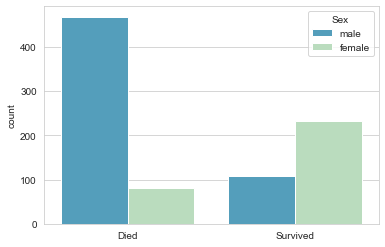

In [7]:
fig, ax = plt.subplots()
sns.countplot(
    x='Survived', 
    data=tt,
    hue='Sex',
    palette='GnBu_r'
)
ax.set(xticklabels=('Died', 'Survived')), ax.set_xlabel('')

([[Text(0, 0, 'Died'), Text(0, 0, 'Survived')]], Text(0.5, 0, ''))

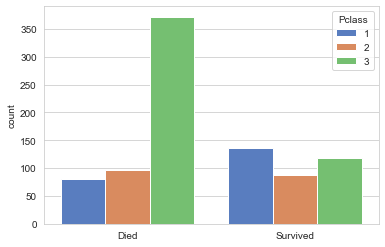

In [8]:
fig, ax = plt.subplots()
sns.countplot(
    x='Survived', 
    data=tt,
    hue='Pclass',
    palette='muted'
)
ax.set(xticklabels=('Died', 'Survived')), ax.set_xlabel('')

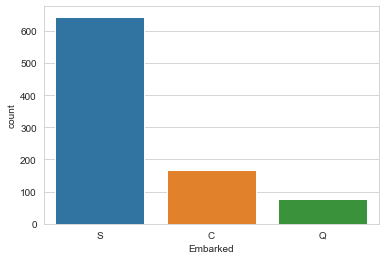

In [9]:
sns.countplot(tt['Embarked'])

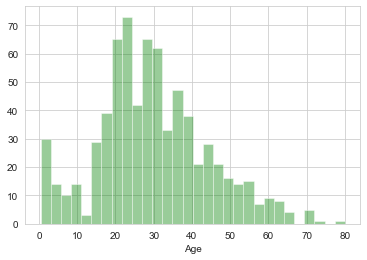

In [10]:
sns.distplot(
    tt['Age'].dropna(),
    kde=False,
    bins=30,
    color='g'
)

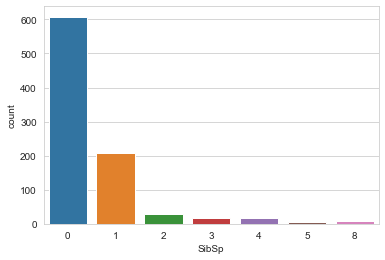

In [11]:
sns.countplot(
    x='SibSp',
    data=tt
)

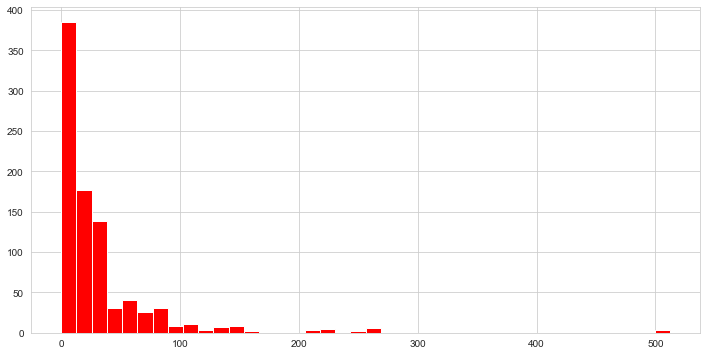

In [12]:
tt['Fare'].hist(
    bins=40,
    figsize=(12, 6),
    color='red',
)

## Clean Data

In [13]:
tt_backup_1 = tt.copy()

`tt.info()` shows there is some missing data in this set.

In [14]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text xticklabel objects>)

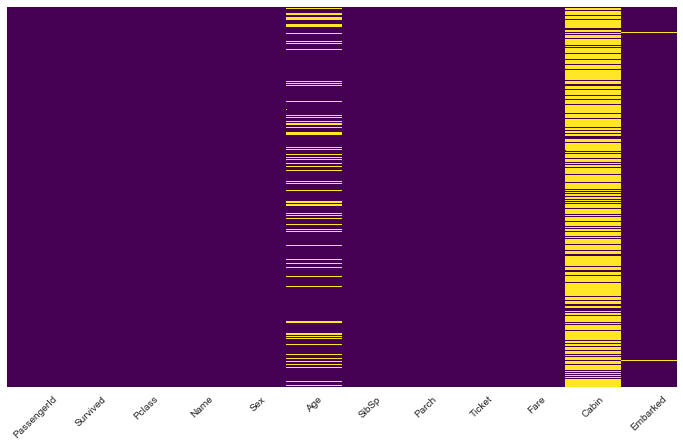

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(
    tt.isnull(),
    cbar=False,
    yticklabels=False,
    cmap='viridis'
)
plt.xticks(rotation=44)

I'm going to begin by using the Passenger Class field the get an average age to assign to all records with a null age field.

Only around 20% of the data is missing from the age field, so I can make a reasonable assumption for any missing values. Instead of using the overall age, I will use the average age broken down into smaller categories to try and get closer to the truth. 

In [16]:
tt.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


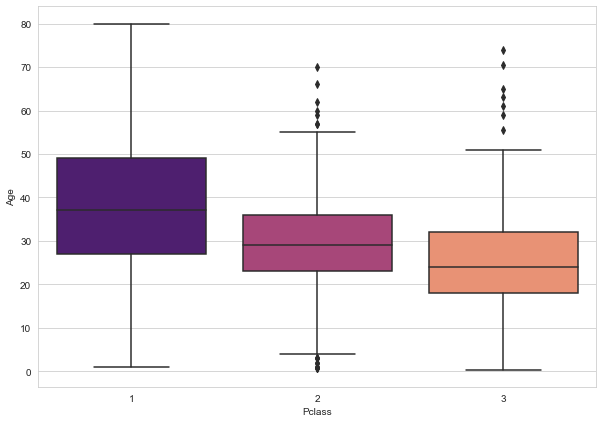

In [17]:
plt.figure(figsize=(10, 7))
sns.boxplot(
    x='Pclass',
    y='Age',
    data=tt,
    palette='magma'
)

In [18]:
age_by_class = dict(tt.groupby('Pclass')['Age'].mean().dropna())
age_by_class

{1: 38.233440860215055, 2: 29.87763005780347, 3: 25.14061971830986}

In [19]:
def infer_age(x):
    age = x['Age']
    ind = x['Pclass']
    if pd.isnull(age):
        return int(age_by_class[ind])
    return int(age)

In [20]:
tt['Age'] = tt.apply(infer_age, axis='columns')
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [21]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [22]:
tt_backup_2 = tt.copy()

Cabin is missing too many values, and I'm not certain much useful insight can be gained from this field. Therefore I am just going to drop it.

In [23]:
tt.drop('Cabin', axis='columns', inplace=True)
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


Two values are missing from embarked. These rows can be dropped also, leaving no blanks.

In [24]:
tt.dropna(inplace=True)
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


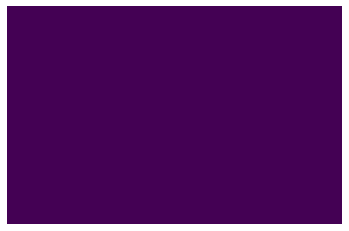

In [25]:
sns.heatmap(
    tt.isnull(),
    cbar=False,
    yticklabels=False,
    xticklabels=False,
    cmap='viridis'
)

Add dummy variables

In [26]:
sex = pd.get_dummies(tt['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [27]:
embarked = pd.get_dummies(tt['Embarked'], drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [28]:
tt = pd.concat(
    [tt, sex, embarked],
    axis='columns'
)
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,1,0,1


In [29]:
tt.drop(
    ['PassengerId', 'Name', 'Sex', 'Embarked', 'Ticket'],
    axis='columns',
    inplace=True
)
tt.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1


In [30]:
tt_backup_3 = tt.copy()

## Training and Testing

In [31]:
tt.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [32]:
X = tt.drop('Survived', axis='columns')
y = tt['Survived']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42
)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
281,3,28,0,0,7.8542,1,0,1
435,1,14,1,2,120.0000,0,0,1
39,3,14,1,0,11.2417,0,0,0
418,2,30,0,0,13.0000,1,0,1
585,1,18,0,2,79.6500,0,0,1


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_model = LogisticRegression(solver='liblinear')

In [37]:
log_model.fit(
    X_train, 
    y_train,
)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
predictions = log_model.predict(X_test)
predictions[:15]

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
cr1 = classification_report(y_test, predictions)
print(cr1)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       184
           1       0.76      0.71      0.73       110

    accuracy                           0.81       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.81      0.80       294



In [41]:
confusion_matrix(y_test, predictions)

array([[159,  25],
       [ 32,  78]], dtype=int64)

In [42]:
tt

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,1,0,1
887,1,1,19,0,0,30.0000,0,0,1
888,0,3,25,1,2,23.4500,0,0,1
889,1,1,26,0,0,30.0000,1,0,0


## Model Refinement

I decided to tweak the age estimation, as this had been done quite quickly. I experimented with a few different combinations of fields identified with the `.corr()` Method and found that using (Pclass, SibSp) yielded the most accurate results.

In [43]:
tt = tt_backup_1

In [44]:
tt.drop('Cabin', axis='columns', inplace=True)
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [45]:
tt.corr()['Age'].abs().sort_values(ascending=False)

Age            1.000000
Pclass         0.369226
SibSp          0.308247
Parch          0.189119
Fare           0.096067
Survived       0.077221
PassengerId    0.036847
Name: Age, dtype: float64

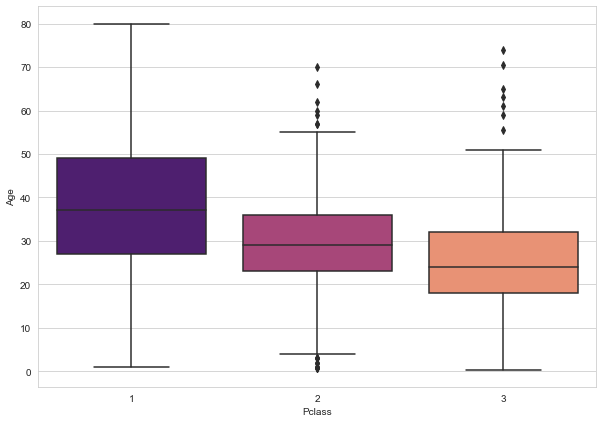

In [46]:
plt.figure(figsize=(10, 7))
sns.boxplot(
    x='Pclass',
    y='Age',
    data=tt,
    palette='magma'
)

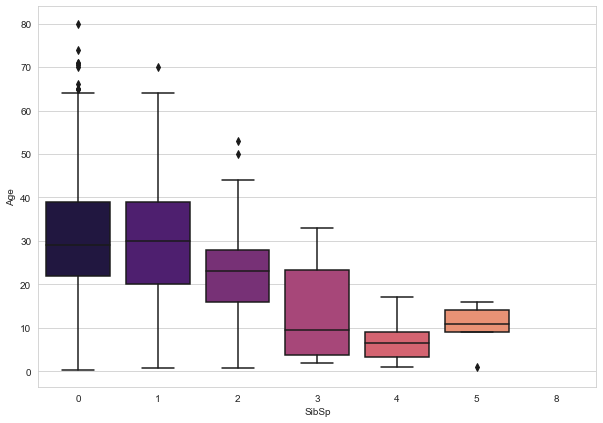

In [47]:
plt.figure(figsize=(10, 7))
sns.boxplot(
    x='SibSp',
    y='Age',
    data=tt,
    palette='magma'
)

In [48]:
age_by_class = dict(tt.groupby(['Pclass','SibSp'])['Age'].mean().dropna())
age_by_class

{(1, 0): 39.18141592920354,
 (1, 1): 37.414153846153845,
 (1, 2): 37.2,
 (1, 3): 22.0,
 (2, 0): 31.93422018348624,
 (2, 1): 27.363636363636363,
 (2, 2): 19.125,
 (2, 3): 30.0,
 (3, 0): 27.63020080321285,
 (3, 1): 24.91269841269841,
 (3, 2): 18.875,
 (3, 3): 8.875,
 (3, 4): 7.055555555555555,
 (3, 5): 10.2}

In [49]:
def infer_age(x):
    age = x['Age']
    ind = (x['Pclass'], x['SibSp'])
    if pd.isnull(age):
        try:
            return int(age_by_class[ind])
        except KeyError:
            return 9999
    return int(age)

In [50]:
tt['Age'] = tt.apply(infer_age, axis='columns')
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [51]:
tt = tt[tt['Age'] != 9999]

In [52]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


I also found that the title of an individual helped the model to predict their fate more accurately, although the difference was much more minor than the adjusted age.

In [53]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    884 non-null int64
Survived       884 non-null int64
Pclass         884 non-null int64
Name           884 non-null object
Sex            884 non-null object
Age            884 non-null int64
SibSp          884 non-null int64
Parch          884 non-null int64
Ticket         884 non-null object
Fare           884 non-null float64
Embarked       882 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 82.9+ KB


In [54]:
tt.dropna(inplace=True)

C:\Anaconda3\envs\testenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
import re

In [56]:
def title_search(x):
    common_titles = ['Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'Rev']
    srch = re.search(r'^.+, (\w+)\. .+$', x)
    if srch:
        title = srch.group(1)
        if title in common_titles:
            return title
        else:
            return 'Other'

In [57]:
tt['Title'] = tt['Name'].apply(
    title_search
)
tt

C:\Anaconda3\envs\testenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,Mr


In [58]:
tt['Title'].value_counts()

Mr        514
Miss      178
Mrs       124
Master     39
Other      13
Dr          7
Rev         6
Name: Title, dtype: int64

In [59]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    882 non-null int64
Survived       882 non-null int64
Pclass         882 non-null int64
Name           882 non-null object
Sex            882 non-null object
Age            882 non-null int64
SibSp          882 non-null int64
Parch          882 non-null int64
Ticket         882 non-null object
Fare           882 non-null float64
Embarked       882 non-null object
Title          881 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 89.6+ KB


In [60]:
title = pd.get_dummies(tt['Title'], drop_first=True)
title.head()

,Master,Miss,Mr,Mrs,Other,Rev
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [61]:
tt = pd.concat(
    [tt, sex, embarked, title],
    axis='columns'
)
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,male,Q,S,Master,Miss,Mr,Mrs,Other,Rev
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,...,Mr,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,...,Mrs,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,...,Miss,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,Mrs,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,...,Mr,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
tt.dropna(inplace=True)
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 890
Data columns (total 21 columns):
PassengerId    881 non-null float64
Survived       881 non-null float64
Pclass         881 non-null float64
Name           881 non-null object
Sex            881 non-null object
Age            881 non-null float64
SibSp          881 non-null float64
Parch          881 non-null float64
Ticket         881 non-null object
Fare           881 non-null float64
Embarked       881 non-null object
Title          881 non-null object
male           881 non-null uint8
Q              881 non-null uint8
S              881 non-null uint8
Master         881 non-null float64
Miss           881 non-null float64
Mr             881 non-null float64
Mrs            881 non-null float64
Other          881 non-null float64
Rev            881 non-null float64
dtypes: float64(13), object(5), uint8(3)
memory usage: 133.4+ KB


In [63]:
tt.drop(
    ['PassengerId', 'Name', 'Sex', 'Embarked', 'Ticket', 'Title'],
    axis='columns',
    inplace=True
)
tt.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Master,Miss,Mr,Mrs,Other,Rev
0,0.0,3.0,22.0,1.0,0.0,7.2500,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0


## Re-training and Testing

In [64]:
tt.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S',
       'Master', 'Miss', 'Mr', 'Mrs', 'Other', 'Rev'],
      dtype='object')

In [65]:
X = tt.drop('Survived', axis='columns')
y = tt['Survived']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42
)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Master,Miss,Mr,Mrs,Other,Rev
355,3.0,28.0,0.0,0.0,9.5000,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0
258,1.0,35.0,0.0,0.0,512.3292,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
495,3.0,27.0,0.0,0.0,14.4583,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0
693,3.0,25.0,0.0,0.0,7.2250,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0
398,2.0,23.0,0.0,0.0,10.5000,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
log_model = LogisticRegression(solver='liblinear')

In [68]:
log_model.fit(
    X_train, 
    y_train,
)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
predictions = log_model.predict(X_test)
predictions[:15]

array([0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.])

In [70]:
cr2 = classification_report(y_test, predictions)
print(cr2)

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       180
         1.0       0.81      0.75      0.78       111

    accuracy                           0.84       291
   macro avg       0.83      0.82      0.82       291
weighted avg       0.83      0.84      0.83       291



In [71]:
print(cr1)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       184
           1       0.76      0.71      0.73       110

    accuracy                           0.81       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.81      0.80       294



The model is more accurate second time round! This did actually take a few attempts (trial and error):
- More granular average age calculation made a noticable difference.
- Title also has a small impact.
- Creating a boolean for if the cabin number was known actually had a negative impact.
- Making the basis for the average any more granular e.g. Pclass, SibSp, Parch made the model less accurate.
- Dropping null ages all together had a similar effect, but not as strong.

# The End!